In [1]:
import pandas as pd 
from pandas import datetime 
import matplotlib.pyplot as plt 

In [2]:
def parser(x):
    return datetime.strptime(x,'%Y-%m')

In [3]:
sales = pd.read_csv('sales-cars.csv',index_col = 0,parse_dates = [0],date_parser = parser)
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


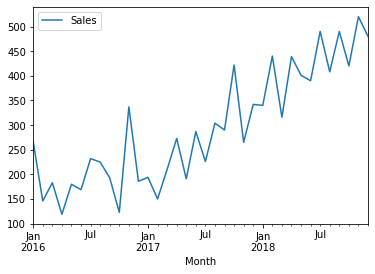

In [4]:
sales.plot()

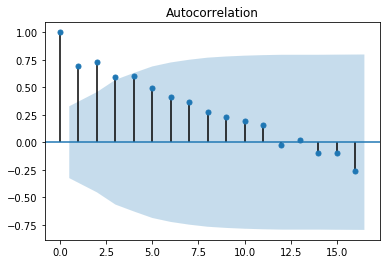

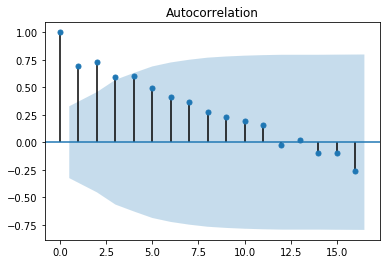

In [5]:
from statsmodels.graphics.tsaplots import plot_acf 
plot_acf(sales)

Stationary means,mean variance and covariance is constant over the periods 

# Convering series to stationary 

In [6]:
#Integrated of order 1,denoted by d
sales_diff = sales.diff(periods = 1)

In [7]:
sales_diff = sales_diff[1:]
sales_diff.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


In [8]:
sales.shift(1).head()

,Sales
Month,
2016-01-01,NaN
2016-02-01,266.0
2016-03-01,146.0
2016-04-01,183.0
2016-05-01,119.0


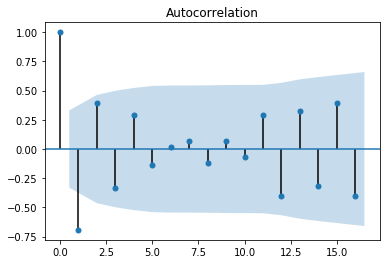

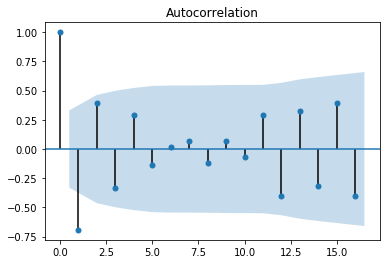

In [9]:
plot_acf(sales_diff)

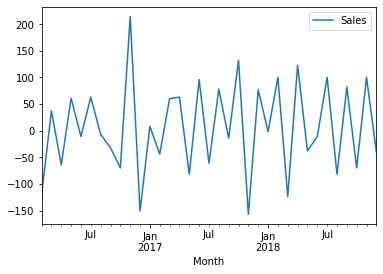

In [10]:
sales_diff.plot()

In [11]:
X = sales.values
train = X[:27]
test = X[27:]

# AutoRegressive Model 

In [12]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [13]:
predictions = model_ar_fit.predict(start = 26 , end = 36)

In [14]:
test

array([[439],
       [401],
       [390],
       [490],
       [408],
       [490],
       [420],
       [520],
       [480]], dtype=int64)

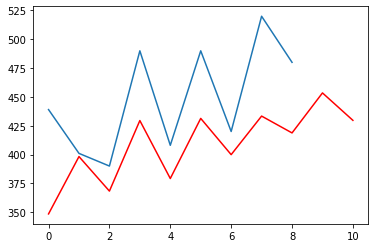

In [15]:
plt.plot(test)
plt.plot(predictions , color = 'red')

# ARIMA Model 

In [16]:
from statsmodels.tsa.arima_model import ARIMA

In [17]:
#p - Periods taken for autoregressive model 
#q - Integrated order,difference 
#q - Periods in moving average model 

model_arima = ARIMA(train,order = (9,2,0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

297.1619840247073


In [18]:
predictions = model_arima_fit.forecast(steps = 10)[0]
predictions

array([396.05389227, 355.95036564, 413.1006944 , 374.51563216,
       446.958799  , 378.63360005, 406.38901653, 411.40328211,
       475.91479427, 415.40412178])

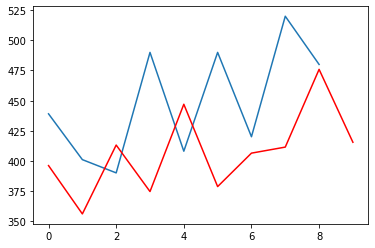

In [19]:
plt.plot(test)
plt.plot(predictions , color = 'red')

In [20]:
import itertools 
p = d = q = range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [21]:
import warnings 
warnings.filterwarnings('ignore')

for param in pdq:
    try:
        model_arima = ARIMA(train,order = param)
        model_arima_fit = model_arima.fit()
        print(param , model_arima_fit.aic)
    except:
        continue     

(0, 0, 0) 319.45285852307086
(0, 0, 1) 318.72448093894775
(0, 0, 2) 315.25060028735857
(0, 0, 3) nan
(0, 0, 4) nan
(0, 1, 0) 311.8293983488534
(0, 1, 1) 296.0841521691394
(0, 1, 2) 296.3229226907705
(0, 2, 0) 329.1834958250828
(0, 2, 1) 306.10194849153686
(1, 0, 0) 316.16687175281163
(1, 0, 1) 313.0487174408848
(1, 0, 2) 310.9790642224201
(1, 0, 4) 309.6779931143069
(1, 1, 0) 298.8325442271006
(1, 1, 1) 297.1256511258628
(1, 1, 2) 299.47166670628087
(1, 1, 3) 301.28511809477766
(1, 2, 0) 306.53077675711666
(1, 2, 3) 290.3253393843979
(2, 0, 0) 310.99695736347644
(2, 0, 1) 338.45356343885084
(2, 1, 0) 300.20895612403393
(2, 1, 1) 297.99999301673984
(2, 1, 2) 298.55054281302296
(2, 1, 3) 302.87208273388904
(2, 2, 0) 306.2975856432128
(3, 0, 0) 312.9838587452497
(3, 0, 1) 337.99465379136234
(3, 1, 0) 294.85435842186854
(3, 1, 1) 295.99793534184613
(3, 1, 2) 292.66862386947423
(3, 1, 3) 294.6588907520845
(3, 2, 0) 299.4075868155525
(3, 2, 4) 291.27504909642664
(4, 0, 0) 319.82957909893315
